<a href="https://colab.research.google.com/github/alibani30min/Hello-Word/blob/master/Day1_HandsOns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

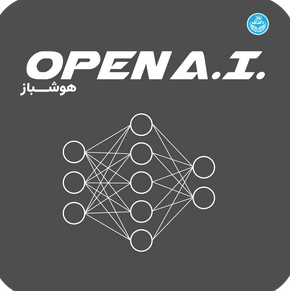

<!-- <img src="../assets/logo3.png" width="200" height="200" > -->

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day1 - HandsOn</b></font><br>
        <hr/>

</div>

<pre>
.
├── Step 1: Import necessary libraries and load the dataset
│
├── Step 2: Understand the dataset and perform exploratory data analysis (EDA)
│
├── Step 3: Visualization
│ 
├── Step 4: Split the dataset into features (X) and target variable (y)
│ 
├── Step 5: Split the dataset into training and test sets
│
├── Step 6: Running the KNN algorithm on the dataset
│
├── Step 7: Checking the output of the algorithm
│
├── Step 8: Checking the effect of dimension normalization on the model's performance
│
├── Step 9: Comparing the accuracy before and after normalization
│
├── Step 10: Checking the effect of model parameters
│
└── Step 11: Checking the types of distance functions

</pre>

# Part 1

## Step 1: Import necessary libraries and load the dataset


* In this step, we import the necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, and the breast cancer dataset from scikit-learn.
* The breast cancer dataset contains information about various features computed from digitized images of breast mass samples.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.datasets import load_breast_cancer
# or we can use this command : skl.datasets.load_breast_cancer

## Step 2: Understand the dataset and perform exploratory data analysis (EDA)

* We will use the Breast Cancer dataset for this example.
* The load_breast_cancer function loads the dataset.

* In this step, we create a DataFrame from the feature data of the breast cancer dataset.
* We add the target variable (diagnosis) to the DataFrame.
* The first few rows of the DataFrame are displayed to get an initial understanding of the data.
* We check the shape of the DataFrame to see the number of rows and columns.
* Missing values are checked to ensure the data is complete.
* We visualize the distribution of the target variable using a countplot.
* The correlation between features is computed and visualized using a heatmap.

In [22]:
# Load dataset
cancer = load_breast_cancer()

### About the dataset


The Breast Cancer dataset used in the code is a popular benchmark dataset for binary classification tasks. It is available in scikit-learn and contains measurements of various features computed from digitized images of breast mass samples. The goal is to classify whether a given sample is benign (non-cancerous) or malignant (cancerous).

Here's some information about the Breast Cancer dataset:

* Number of Instances: 569
* Number of Features: 30
* Target Variable: Diagnosis (Benign or Malignant)
* Benign: Represented by 0
* Malignant: Represented by 1



### Create a DataFrame with the feature data

In [32]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#df


### Add the target variable to the DataFrame

In [34]:
df['target'] = pd.Series(cancer.target)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Check the first few rows of the DataFrame


* Let's take a look at the first few rows of the dataset to understand its structure and contents.

* This will help us get a sense of the data we are working with.

* Display the first few rows of the dataset

In [35]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


### Check the shape of the DataFrame


In [36]:
df.shape

(569, 31)

### Check for missing values

In [47]:
#df['mean radius'].isnull().values.any()
#df.isnull()
#df['mean radius'].isnull().sum()
df.isnull().values.any()
df.isnull().sum().sum()

0

### Check the distribution of the target variable


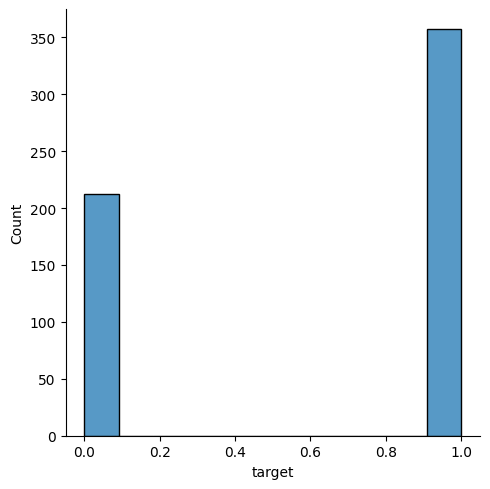

1    357
0    212
Name: target, dtype: int64

In [59]:
sns.displot(df['target'])
plt.show()
df['target'].value_counts()

### Check the correlation between features

<Axes: >

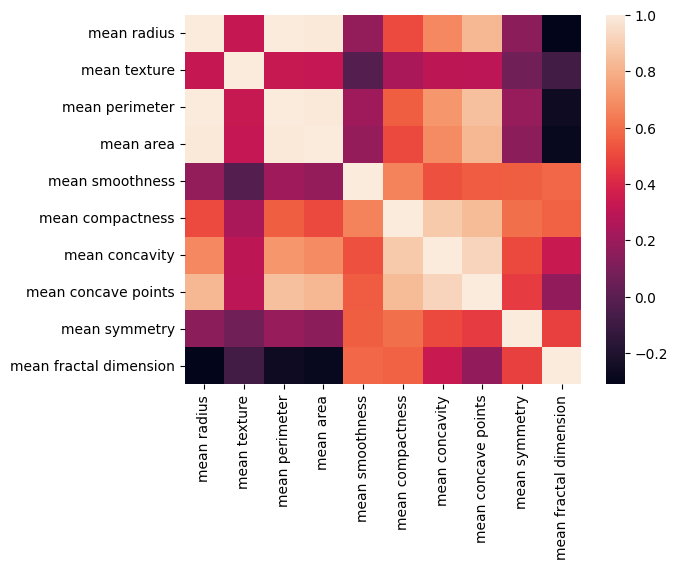

In [70]:
np.corrcoef(df['mean area'],df['mean texture'])
df.corr
df.iloc[:,0:5].corr()
sns.heatmap(df.iloc[:,0:10].corr(),annot=False)

## Step 3: Visualization

### Perform a scatter plot to visualize two features

* To visualize the relationship between two features, convert the dataset to a DataFrame using pd.DataFrame(data.data, columns=data.feature_names) and assign the target values using df['target'] = data.target.
* Define the two features (mean radius and mean texture) that you want to visualize by setting the variables feature1 and feature2.
* Create a scatter plot using plt.scatter to plot the two features against each other. The color of each point represents the target variable (target) using the c parameter and a cool-warm colormap.
* Finally, add labels and a title to the plot for better understanding and visualization.

In [ ]:
# Convert the dataset to a DataFrame
import pandas as pd


# Define the features to visualize


# Create a scatter plot



### Create a boxplot to compare the distribution of a feature by target class

* To compare the distribution of a feature based on target class, import the seaborn library using import seaborn as sns.
* Specify the feature you want to analyze by setting the variable feature to 'mean area'.
* Create a boxplot using sns.boxplot, where the x-axis represents the target variable (target), and the y-axis represents the feature values.
* Add labels and a title to the plot to provide clear information about the visualization.


In [ ]:
# Import the necessary library
import seaborn as sns

# Define the feature for boxplot

# Create a boxplot


### Visualize the distribution of a feature by target class using a histogram

* To visualize the distribution of a feature based on target class, specify the feature you want to analyze by setting the variable feature to 'mean smoothness'.
* Create a histogram using sns.histplot. The feature values will be represented on the x-axis, and the frequency of occurrence will be represented on the y-axis. The histogram bars will be overlaid with a KDE (kernel density estimation) curve.
* Add labels and a title to the plot to provide clear information

In [ ]:
# Define the feature for histogram

# Create a histogram with KDE


## Step 4: Split the dataset into features (X) and target variable (y)

* In machine learning, we typically split the dataset into features (input variables) and a target variable (output variable).
* The features are the attributes or characteristics of the data that we will use to make predictions.
* The target variable is the variable we want to predict.

* Split the dataset into features (X) and target variable (y)


In [ ]:

# you also can use df for spilt dataset by drop().

## Step 5: Split the dataset into training and test sets

* It is important to evaluate our machine learning model on data it has never seen before.
* Therefore, we split the dataset into a training set and a test set.
* The training set will be used to train the model, and the test set will be used to evaluate its performance.

* Split the dataset into training and test sets


In [ ]:
from sklearn.model_selection import train_test_split



___________

# Part 2

## Step 6: Running the KNN algorithm on the dataset

* Creating a KNN classifier
* fitting it to the training data
* making predictions on the test data.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier


## Step 7: Checking the output of the algorithm

* Printing the predicted labels to see the output of the KNN algorithm.




## Step 8: Checking the effect of normalization on the model's performance

* Normalizing the feature variables using StandardScaler to improve the model's performance.



In [ ]:
from sklearn.preprocessing import StandardScaler



## Step 9: Comparing the accuracy before and after normalization


## Step 10: Checking the effect of model parameters

* Varying the number of neighbors (k) to observe its effect on the model's accuracy.


## Step 11: Checking the types of distance functions
* Varying the distance metric used by the KNN algorithm to observe its effect on accuracy.



In [ ]:

distance_functions = ['euclidean', 'manhattan', 'chebyshev']